# Correlation & Covariance

Finding the correlation matrix of features is a significant part of exploratory data analysis (EDA) in machine learning problems. Before learning about correlation we need to know about covariance.

Covariance is a statistical measure to find the relationship between two variables. It assumes a linear model between the participating quantities. 

Let C = covariance(x, y) then:
- If C > 1: increasing x -> increasing y, vice versa
- If C = 0: x and y are unrelated
- If C < 1: increasing x -> decreasing y, vice versa


# Datagen
Lets create 100 data points


Y is linearly related to X


Z is inversely related to X


W is yet another random array not related to X at all

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.random.randint(1, 500, 100)

In [ ]:
noise = np.random.randint(1, 500, 100)
seed = 5
Y = seed * X + noise

In [ ]:
noise = np.random.randint(1, 500, 100)
seed = 5
Z = X - seed * X + noise

In [ ]:
W = np.random.randint(1, 500, 100)

# Covariance
The statistical formula for covariance is:
![](https://i.imgur.com/cnJESII.png)
Lets test it empirically

In [ ]:
def covariance(X, Y):
    x_prime, y_prime = np.mean(X), np.mean(Y)
    prod = 0
    for x, y in zip(X, Y):
        prod += (x - x_prime) * (y - y_prime)
    return prod/(len(X))        

In [ ]:
covariance(X, Y)

In [8]:
covariance(X, Z)

In [9]:
covariance(X, W)

-2464.1679999999997

Covariance between X and Y is positive. 


Covariance between X and Z is negative.


Covariance between X and W is closer to zero (compared to above two).

The plots for the above arrays show this:

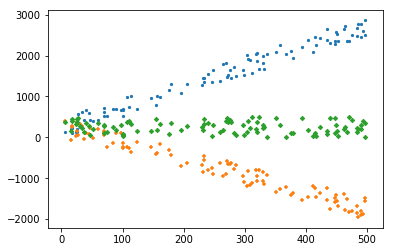

In [10]:
plt.scatter(X, Y, s=19, marker='.')
plt.scatter(X, Z, s=19, marker='+')
plt.scatter(X, W, s=9, marker='D')
plt.show()

# Correlation


The major problem with covariance is interpretation. The only interpretation that covariance offers lies in it being positive or negative. We don't know the degree to which a variable varies with other. For this we introduce another metric called correlation. 
![](https://i.imgur.com/YLY5DyX.png)
σ = standard deviation


Like covariance, correlation can be interpreted as:


Let C = correlation(x, y) then:
- If C > 1: increasing x -> increasing y, vice versa
- If C = 0: x and y are unrelated
- If C < 1: increasing x -> decreasing y, vice versa

Additionally, C ∈ [-1,1]
- C = 1 very high linearly direct relation 
- C = -1 very high linearly inverse relation
- C = 0 no relation


let's test it empirically

Y_1 is highly +ve correlated (low noise) to X


Y_2 is less +ve correlated (high noise) to X


Z_1 is highly -ve correlated (low noise) to X


Z_2 is less -ve correlated (high noise) to X


W is not correlated to X at all


In [11]:
X = np.random.randint(1, 500, 100)
low_noise = np.random.randint(1, 10, 100)
high_noise = np.random.randint(1, 10000, 100)

In [12]:
seed = 5
Y_1 =  X * seed + low_noise
Y_2 =  X * seed + high_noise
Z_1 = X - seed * X + low_noise
Z_2 = X - seed * X + high_noise
W = np.random.randint(1, 500, 100)

In [13]:
def correlation(X, Y):
    sigma_x, sigma_y = np.std(X), np.std(Y)
    return covariance(X, Y) / (sigma_x * sigma_y)

In [14]:
correlation(X, Y_1)

0.9999934454374622

In [15]:
correlation(X, Y_2)

0.3113149172262194

In [16]:
correlation(X, Z_1)

-0.9999897395130402

In [17]:
correlation(X, Z_2)

-0.10033999421188486

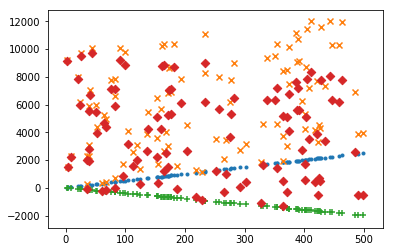

In [18]:
plt.scatter(X, Y_1, marker='.')
plt.scatter(X, Y_2, marker='x')
plt.scatter(X, Z_1, marker='+')
plt.scatter(X, Z_2, marker='D')
plt.show()

The results above are exactly as predicted

# Significance in machine learning

Correlation is an important metric for EDA. 


Two highly correlated features (value near -1 or 1) are redundant. One of them can be safely dropped.
Generally, a value greater than 0.5 and less than -0.5 is considered pretty correlated.


In case of supervised learning, features correlated with the target or dependent variable are important features. 


Sometimes features highly uncorrelated with target variable are dropped but this should be avoided because correlation assumes a linear relationship between participating features which often is not the case.